# <font color= blue> <u> Car Information Dataset: An Explanatory Data Analysis </u> </font>

![](https://storage.googleapis.com/kaggle-datasets-images/3331115/5799875/21762c21884aa9f3d900cf494cb7ec16/dataset-cover.jpg?t=2023-05-28-18-33-06)

In this project, I will be conducting an exploratory data analysis on a car information dataset. The dataset used is called [Car information dataset](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset) and is available for free on [Kaggle](https://www.kaggle.com/). Kaggle is a webservice that supplies a broad variation of datasets for free.


The dataset contains **398 rows** of **9 features**.

> ## <u> DATA OVERVIEW: </u>
> The dataset consists of the following columns:
> - **Name**: Unique identifier for each automobile.
> - **MPG**: Fuel efficiency measured in miles per gallon indicating how many miles the vehicle can travel per gallon of fuel.
> - **Cylinders**: Number of cylinders in the engine and it provides information about the engine's configuration and performance characteristics.
> - **Displacement**: Engine displacement, indicating its size or capacity.
> - **Horsepower**: Power output of the engine and it provides an indication of the engine's performance capabilities.
> - **Weight**: Weight of the automobile which can have an impact on the vehicle's fuel efficiency and handling.
> - **Acceleration**: Capability to increase speed, measured in seconds.
> - **Model Year**: Year of manufacture for the automobile model which can be useful for analyzing trends or changes in the automotive industry over time.
> - **Origin**: Country or region of origin for each automobile in the dataset which provides information about the car's manufacturing origin and can be useful for studying regional preferences or differences in car performance.

With this dataset, I aim to analyze and uncover insights about the different features of the cars, understand the relationships between variables, and explore any interesting patterns or trends.

Throughout this project, I will be utilizing all the tools and techniques I learned from the course, [Data Analysis with Python: Zero to Pandas](zerotopandas.com). This course provided a comprehensive introduction to data analysis using Python and covered topics such as data manipulation, visualization, exploratory data analysis, and more.

By applying the knowledge and skills gained from this course, I will perform descriptive statistics, create visualizations, identify correlations, detect outliers presence and extract meaningful information from this dataset. Let's dive into the analysis and unlock valuable insights from the data!

## <font color= blue> <u> Downloading the Dataset </u> </font>

Before we download our dataset, it is essential to upload the `kaggle.json` file into our current working directory.
To do so, we simply click on:
> **File → Open → Upload → Under Organize, Downloads → kaggle.json → Open → Upload.**

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Now, let's import the `os` module.

In [2]:
import os
os.getcwd() # To check current working directory

'/home/jovyan/work/16ca7c1ae52a4902a8495c6991a8e4ee_915'

In [3]:
os.listdir('.') # To get list of files in current working directory (relative path)

['.git',
 '.jovianrc',
 'car-information-dataset-ed.ipynb',
 '.ipynb_checkpoints',
 'kaggle.json']

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Kaggle URL for the dataset
dataset_url = 'https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset'

In [5]:
import opendatasets as od
od.download(dataset_url,'.')

100%|██████████| 6.45k/6.45k [00:00<00:00, 4.29MB/s]

The dataset has been downloaded and extracted.

In [6]:
# Path to the local Data
data_dir = './automobile-dataset'

In [7]:
import os
os.listdir(data_dir)

['Automobile.csv']

## <font color= blue> <u>  Data Preparation and Cleaning </u> </font>

Before diving into the exploratory data analysis, it is important to prepare and clean the dataset to ensure its quality and reliability. This involves handling missing values, removing duplicates, addressing inconsistencies, and transforming data if necessary.

Let's outline the steps taken for data preparation and cleaning in the context of this car dataset:
1. **Handling Missing Values**: Identify any missing values in the dataset, represented by *NaN* or other placeholders. Decide on the appropriate strategy for handling missing values based on the specific column and the impact on the analysis. Common strategies include dropping rows with missing values, imputing missing values with the mean or median, or using more advanced techniques like regression imputation.
2. **Dealing with Duplicates**: Check for duplicate rows in the dataset, which can skew the analysis and lead to incorrect results. If duplicate rows are found, decide on the appropriate action, such as dropping duplicates or aggregating information from duplicate rows.
3. **Addressing Inconsistencies**: Examine the values in each column to identify any inconsistencies, such as inconsistent formatting or conflicting information. Clean the data by standardizing formats, resolving inconsistencies, and ensuring consistency across the dataset.
4. **Transforming Data**: Analyze each feature and determine if any transformations are needed to improve the analysis or address specific requirements. This may involve converting data types, scaling variables, creating new derived features, or performing other necessary transformations.
5. **Handling Outliers**: Detect and analyze any outliers in the dataset, which are data points that significantly deviate from the rest of the distribution. Decide on the appropriate approach for handling outliers, which may involve removing them, transforming them, or treating them as special cases based on domain knowledge.

By following these steps, we can ensure that the dataset is clean, consistent, and ready for further analysis. Data preparation and cleaning are essential to obtain accurate and reliable insights during the exploratory data analysis process.



In [8]:
import pandas as pd
import numpy as np

In [9]:
# Read the csv file by the Pandas library
fname="./automobile-dataset/Automobile.csv"
car_df=pd.read_csv(fname) 

In [10]:
# View our dataframe
car_df 

name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  origin  
0      3504          12.0          70     usa  
1      3693          11.5          70     usa  
2      3436          11.0          70     usa  
3      3433          12.0          70     usa  
4      3449          10.5          70     usa  
..      ...           ...         ...     ...  
393    2790          15.6          82     usa  
394    2130          24.6          82  europe  
395    2295          11.6          82     usa  
396    2625          18.6          82     usa  
397    2720          19.4          82     usa  

[398 rows x 9 columns]

In [11]:
car_df.keys() # Columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [12]:
# Compute some important statistics of numerical columns
car_df.describe().round(2)

mpg  cylinders  displacement  horsepower   weight  acceleration  \
count  398.00     398.00        398.00      392.00   398.00        398.00   
mean    23.51       5.45        193.43      104.47  2970.42         15.57   
std      7.82       1.70        104.27       38.49   846.84          2.76   
min      9.00       3.00         68.00       46.00  1613.00          8.00   
25%     17.50       4.00        104.25       75.00  2223.75         13.82   
50%     23.00       4.00        148.50       93.50  2803.50         15.50   
75%     29.00       8.00        262.00      126.00  3608.00         17.18   
max     46.60       8.00        455.00      230.00  5140.00         24.80   

       model_year  
count      398.00  
mean        76.01  
std          3.70  
min         70.00  
25%         73.00  
50%         76.00  
75%         79.00  
max         82.00

The columns, `horsepower`, `displacement` and `weight` seem to be significantly skewed as the median (50 percentile) is much lower than the maximum value. 

In [13]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


The ranges of values in the numerical columns seem reasonable too (no negative numbers!), so we may not have to do much data cleaning or correction.

Column `horsepower` contains missing values as out of 398 entries only 392 elements are present!!

In [14]:
car_df[car_df.horsepower.isna()]

name   mpg  cylinders  displacement  horsepower  weight  \
32             ford pinto  25.0          4          98.0         NaN    2046   
126         ford maverick  21.0          6         200.0         NaN    2875   
330  renault lecar deluxe  40.9          4          85.0         NaN    1835   
336    ford mustang cobra  23.6          4         140.0         NaN    2905   
354           renault 18i  34.5          4         100.0         NaN    2320   
374        amc concord dl  23.0          4         151.0         NaN    3035   

     acceleration  model_year  origin  
32           19.0          71     usa  
126          17.0          74     usa  
330          17.3          80  europe  
336          14.3          80     usa  
354          15.8          81  europe  
374          20.5          82     usa

Let's import `plotly.express`, `matplotlib.pyplot` and `seaborn` to help us in data visualisation.

In [15]:
!pip install plotly --upgrade --quiet

In [16]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

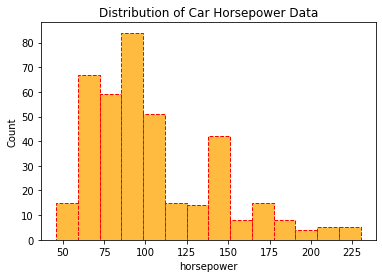

In [17]:
sns.histplot(car_df.horsepower,
             color='orange', 
             edgecolor='red', 
             linestyle='--')
sns.set_style('whitegrid')
plt.title ("Distribution of Car Horsepower Data");

The distribution is postively skewed.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


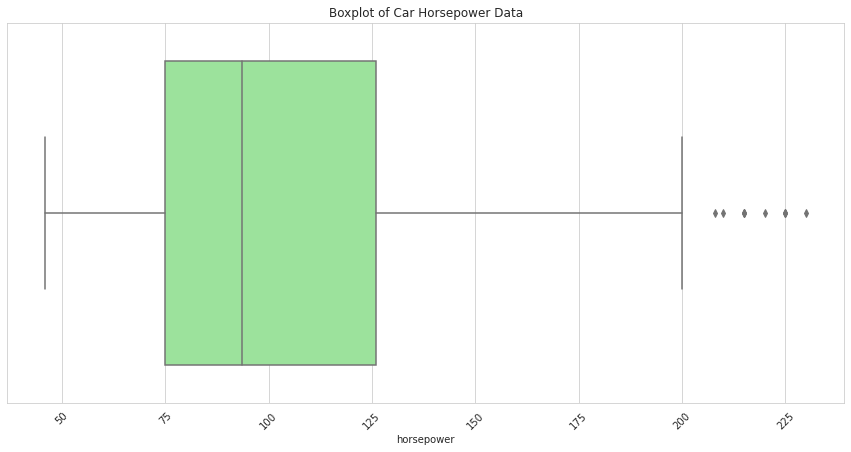

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(car_df['horsepower'],color='lightgreen')
plt.xticks(rotation=45)
plt.title ("Boxplot of Car Horsepower Data");

From the above boxplot, we can clearly see that we have 6 outliers in the column. To deal with the missing values, we simply replace them by the median of the data since imputing with the median is more robust than imputing with the mean.

We have obtained the following statistics value as given below:
- Mean = 104.47
- Max = 230

The mean is sensitive to outliers, but the fact the mean is small compared to the maximum value indicates that the maximum value is an outlier.

In [19]:
car_df.horsepower.loc[32]=car_df.horsepower.median()
car_df.horsepower.loc[126]=car_df.horsepower.median()
car_df.horsepower.loc[330]=car_df.horsepower.median()
car_df.horsepower.loc[336]=car_df.horsepower.median()
car_df.horsepower.loc[354]=car_df.horsepower.median()
car_df.horsepower.loc[374]=car_df.horsepower.median()




/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
car_df[car_df.horsepower.isna()]

Empty DataFrame
Columns: [name, mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin]
Index: []

Now our dataframe is free from missing values.

In [21]:
car_df.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

Note that:

- maxda = mazda
- toyota = toyouta
- vokswagen = volkswagen = vw
- chevrolet = chevroelt = chevy

In [22]:
# Before Data cleaning
car_df.name.nunique()

305

In [23]:
# Remove the wrong car names
for cars in car_df.name:
    q=cars.split(" ")
    for i, word in enumerate(q):
        if word== "maxda":
            q[i]= "mazda"
        if word=="toyouta":
            q[i]="toyota"
        if word=="vokswagen":
            q[i]= "volkswagen"
        if word=="vw":
            q[i]="volkswagen"
        if word=="chevroelt":
            q[i]="chevrolet"
        if word=="chevy":
            q[i]="chevrolet"
    car_df.name[car_df[car_df.name==cars].index.values]= " ".join(q)

/tmp/ipykernel_305/3359125429.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.name[car_df[car_df.name==cars].index.values]= " ".join(q)


In [24]:
# After Data Cleaning
car_df.name.nunique()

300

In [25]:
car_df

name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394          volkswagen pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397             chevrolet s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  origin  
0      3504          12.0          70     usa  
1      3693          11.5          70     usa  
2      3436          11.0          70     usa  
3      3433          12.0          70     usa  
4      3449          10.5          70     usa  
..      ...           ...         ...     ...  
393    2790          15.6          82     usa  
394    2130          24.6          82  europe  
395    2295          11.6          82     usa  
396    2625          18.6          82     usa  
397    2720          19.4          82     usa  

[398 rows x 9 columns]

Dataframe consists of 398 rows and 9 columns.

In [26]:
# Checking the new statistics
car_df.describe().round(2) 

mpg  cylinders  displacement  horsepower   weight  acceleration  \
count  398.00     398.00        398.00      398.00   398.00        398.00   
mean    23.51       5.45        193.43      104.30  2970.42         15.57   
std      7.82       1.70        104.27       38.22   846.84          2.76   
min      9.00       3.00         68.00       46.00  1613.00          8.00   
25%     17.50       4.00        104.25       76.00  2223.75         13.82   
50%     23.00       4.00        148.50       93.50  2803.50         15.50   
75%     29.00       8.00        262.00      125.00  3608.00         17.18   
max     46.60       8.00        455.00      230.00  5140.00         24.80   

       model_year  
count      398.00  
mean        76.01  
std          3.70  
min         70.00  
25%         73.00  
50%         76.00  
75%         79.00  
max         82.00

In [27]:
# Most repeated car name in the dataframe
car_df.name.value_counts(normalize=False,
                                  ascending=False).head(1)

ford pinto    6
Name: name, dtype: int64

In [28]:
car_df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [29]:
car_df.origin.nunique()

3

In [30]:
car_df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [31]:
np.sort(car_df.mpg.unique())

array([ 9. , 10. , 11. , 12. , 13. , 14. , 14.5, 15. , 15.5, 16. , 16.2,
       16.5, 16.9, 17. , 17.5, 17.6, 17.7, 18. , 18.1, 18.2, 18.5, 18.6,
       19. , 19.1, 19.2, 19.4, 19.8, 19.9, 20. , 20.2, 20.3, 20.5, 20.6,
       20.8, 21. , 21.1, 21.5, 21.6, 22. , 22.3, 22.4, 22.5, 23. , 23.2,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.2, 24.3, 24.5, 25. , 25.1,
       25.4, 25.5, 25.8, 26. , 26.4, 26.5, 26.6, 26.8, 27. , 27.2, 27.4,
       27.5, 27.9, 28. , 28.1, 28.4, 28.8, 29. , 29.5, 29.8, 29.9, 30. ,
       30.5, 30.7, 30.9, 31. , 31.3, 31.5, 31.6, 31.8, 31.9, 32. , 32.1,
       32.2, 32.3, 32.4, 32.7, 32.8, 32.9, 33. , 33.5, 33.7, 33.8, 34. ,
       34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 35. , 35.1, 35.7, 36. , 36.1,
       36.4, 37. , 37.2, 37.3, 37.7, 38. , 38.1, 39. , 39.1, 39.4, 40.8,
       40.9, 41.5, 43.1, 43.4, 44. , 44.3, 44.6, 46.6])

In [32]:
car_df.mpg.value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

In [33]:
car_df.mpg.nunique()

129

In [34]:
np.sort(car_df.cylinders.unique())

array([3, 4, 5, 6, 8])

In [35]:
car_df.cylinders.nunique()

5

In [36]:
car_df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [37]:
car_df.model_year.nunique()

13

In [38]:
np.sort(car_df.weight.unique())

array([1613, 1649, 1755, 1760, 1773, 1795, 1800, 1825, 1834, 1835, 1836,
       1845, 1850, 1867, 1875, 1915, 1925, 1937, 1940, 1945, 1950, 1955,
       1963, 1965, 1968, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2003,
       2019, 2020, 2025, 2035, 2045, 2046, 2050, 2051, 2065, 2070, 2074,
       2075, 2085, 2100, 2108, 2110, 2120, 2123, 2124, 2125, 2126, 2130,
       2135, 2144, 2145, 2150, 2155, 2158, 2160, 2164, 2171, 2188, 2189,
       2190, 2200, 2202, 2205, 2210, 2215, 2219, 2220, 2223, 2226, 2228,
       2230, 2234, 2245, 2246, 2254, 2255, 2264, 2265, 2278, 2279, 2288,
       2290, 2295, 2300, 2310, 2320, 2330, 2335, 2350, 2370, 2372, 2375,
       2379, 2380, 2385, 2391, 2395, 2401, 2405, 2408, 2420, 2430, 2434,
       2451, 2464, 2472, 2489, 2490, 2500, 2506, 2511, 2515, 2525, 2542,
       2545, 2556, 2560, 2565, 2572, 2575, 2582, 2585, 2587, 2592, 2595,
       2600, 2605, 2615, 2620, 2625, 2634, 2635, 2639, 2640, 2648, 2660,
       2665, 2670, 2671, 2672, 2678, 2694, 2700, 27

In [39]:
car_df.weight.nunique()

351

In [40]:
np.sort(car_df.displacement.unique())

array([ 68. ,  70. ,  71. ,  72. ,  76. ,  78. ,  79. ,  80. ,  81. ,
        83. ,  85. ,  86. ,  88. ,  89. ,  90. ,  91. ,  96. ,  97. ,
        97.5,  98. , 100. , 101. , 104. , 105. , 107. , 108. , 110. ,
       111. , 112. , 113. , 114. , 115. , 116. , 119. , 120. , 121. ,
       122. , 130. , 131. , 134. , 135. , 140. , 141. , 144. , 145. ,
       146. , 151. , 155. , 156. , 163. , 168. , 171. , 173. , 181. ,
       183. , 198. , 199. , 200. , 225. , 231. , 232. , 250. , 258. ,
       260. , 262. , 267. , 302. , 304. , 305. , 307. , 318. , 340. ,
       350. , 351. , 360. , 383. , 390. , 400. , 429. , 440. , 454. ,
       455. ])

In [41]:
car_df.displacement.nunique()

82

In [42]:
np.sort(car_df.acceleration.unique())

array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.1, 11.2, 11.3, 11.4,
       11.5, 11.6, 12. , 12.1, 12.2, 12.5, 12.6, 12.8, 12.9, 13. , 13.2,
       13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4,
       14.5, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6,
       15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.4, 16.5, 16.6, 16.7, 16.8,
       16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9,
       18. , 18.1, 18.2, 18.3, 18.5, 18.6, 18.7, 18.8, 19. , 19.2, 19.4,
       19.5, 19.6, 19.9, 20.1, 20.4, 20.5, 20.7, 21. , 21.5, 21.7, 21.8,
       21.9, 22.1, 22.2, 23.5, 23.7, 24.6, 24.8])

In [43]:
car_df.acceleration.nunique()

95

In [44]:
np.sort(car_df.horsepower.unique())

array([ 46. ,  48. ,  49. ,  52. ,  53. ,  54. ,  58. ,  60. ,  61. ,
        62. ,  63. ,  64. ,  65. ,  66. ,  67. ,  68. ,  69. ,  70. ,
        71. ,  72. ,  74. ,  75. ,  76. ,  77. ,  78. ,  79. ,  80. ,
        81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ,  88. ,  89. ,
        90. ,  91. ,  92. ,  93. ,  93.5,  94. ,  95. ,  96. ,  97. ,
        98. , 100. , 102. , 103. , 105. , 107. , 108. , 110. , 112. ,
       113. , 115. , 116. , 120. , 122. , 125. , 129. , 130. , 132. ,
       133. , 135. , 137. , 138. , 139. , 140. , 142. , 145. , 148. ,
       149. , 150. , 152. , 153. , 155. , 158. , 160. , 165. , 167. ,
       170. , 175. , 180. , 190. , 193. , 198. , 200. , 208. , 210. ,
       215. , 220. , 225. , 230. ])

In [45]:
car_df.horsepower.nunique()

94

In [46]:
# Take a sample of 10 to view a snapshot of dataframe
car_df.sample(10)

name   mpg  cylinders  displacement  horsepower  \
361           toyota cressida  25.4          6         168.0       116.0   
90   mercury marquis brougham  12.0          8         429.0       198.0   
88           ford gran torino  14.0          8         302.0       137.0   
231          chrysler cordoba  15.5          8         400.0       190.0   
379            mercury lynx l  36.0          4          98.0        70.0   
240         volkswagen dasher  30.5          4          97.0        78.0   
159                  ford ltd  14.0          8         351.0       148.0   
22                   saab 99e  25.0          4         104.0        95.0   
29               datsun pl510  27.0          4          97.0        88.0   
304        fiat strada custom  37.3          4          91.0        69.0   

     weight  acceleration  model_year  origin  
361    2900          12.6          81   japan  
90     4952          11.5          73     usa  
88     4042          14.5          73     usa  
231    4325          12.2          77     usa  
379    2125          17.3          82     usa  
240    2190          14.1          77  europe  
159    4657          13.5          75     usa  
22     2375          17.5          70  europe  
29     2130          14.5          71   japan  
304    2130          14.7          79  europe

In [47]:
# Filter the dataframe by origin of country
usa_car_df= car_df[car_df.origin=="usa"][['name',
                                          'mpg',
                                          'cylinders',
                                          'displacement',
                                          'horsepower',
                                          'weight',
                                          'acceleration',
                                          'model_year']]
europe_car_df= car_df[car_df.origin=="europe"][['name',
                                          'mpg',
                                          'cylinders',
                                          'displacement',
                                          'horsepower',
                                          'weight',
                                          'acceleration',
                                          'model_year']]
japan_car_df= car_df[car_df.origin=="japan"][['name',
                                          'mpg',
                                          'cylinders',
                                          'displacement',
                                          'horsepower',
                                          'weight',
                                          'acceleration',
                                          'model_year']]

In [48]:
# Filtered dataframe 1
usa_car_df

name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
392           chevrolet camaro  27.0          4         151.0        90.0   
393            ford mustang gl  27.0          4         140.0        86.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397             chevrolet s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  
0      3504          12.0          70  
1      3693          11.5          70  
2      3436          11.0          70  
3      3433          12.0          70  
4      3449          10.5          70  
..      ...           ...         ...  
392    2950          17.3          82  
393    2790          15.6          82  
395    2295          11.6          82  
396    2625          18.6          82  
397    2720          19.4          82  

[249 rows x 8 columns]

In [49]:
# Filtered dataframe 2
japan_car_df

name   mpg  cylinders  displacement  horsepower  weight  \
14   toyota corona mark ii  24.0          4         113.0        95.0    2372   
18            datsun pl510  27.0          4          97.0        88.0    2130   
29            datsun pl510  27.0          4          97.0        88.0    2130   
31           toyota corona  25.0          4         113.0        95.0    2228   
53     toyota corolla 1200  31.0          4          71.0        65.0    1773   
..                     ...   ...        ...           ...         ...     ...   
382         toyota corolla  34.0          4         108.0        70.0    2245   
383            honda civic  38.0          4          91.0        67.0    1965   
384     honda civic (auto)  32.0          4          91.0        67.0    1965   
385          datsun 310 gx  38.0          4          91.0        67.0    1995   
390       toyota celica gt  32.0          4         144.0        96.0    2665   

     acceleration  model_year  
14           15.0          70  
18           14.5          70  
29           14.5          71  
31           14.0          71  
53           19.0          71  
..            ...         ...  
382          16.9          82  
383          15.0          82  
384          15.7          82  
385          16.2          82  
390          13.9          82  

[79 rows x 8 columns]

In [50]:
# Filtered dataframe 3
europe_car_df

name   mpg  cylinders  displacement  horsepower  \
19   volkswagen 1131 deluxe sedan  26.0          4          97.0        46.0   
20                    peugeot 504  25.0          4         110.0        87.0   
21                    audi 100 ls  24.0          4         107.0        90.0   
22                       saab 99e  25.0          4         104.0        95.0   
23                       bmw 2002  26.0          4         121.0       113.0   
..                            ...   ...        ...           ...         ...   
354                   renault 18i  34.5          4         100.0        93.5   
359     peugeot 505s turbo diesel  28.1          4         141.0        80.0   
360                  volvo diesel  30.7          6         145.0        76.0   
375           volkswagen rabbit l  36.0          4         105.0        74.0   
394             volkswagen pickup  44.0          4          97.0        52.0   

     weight  acceleration  model_year  
19     1835          20.5          70  
20     2672          17.5          70  
21     2430          14.5          70  
22     2375          17.5          70  
23     2234          12.5          70  
..      ...           ...         ...  
354    2320          15.8          81  
359    3230          20.4          81  
360    3160          19.6          81  
375    1980          15.3          82  
394    2130          24.6          82  

[70 rows x 8 columns]

We see that most of the cars in our dataset are manufactured in **USA**.

# <font color= blue> <u> Exploratory Analysis and Visualization</u> </font>

To gain insights from the car dataset, exploratory analysis and visualization techniques can be applied. By exploring the data and visualizing it in different ways, we can uncover patterns, relationships, and trends. 



## <u>Correlated Columns</u>:

In [51]:
car_df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

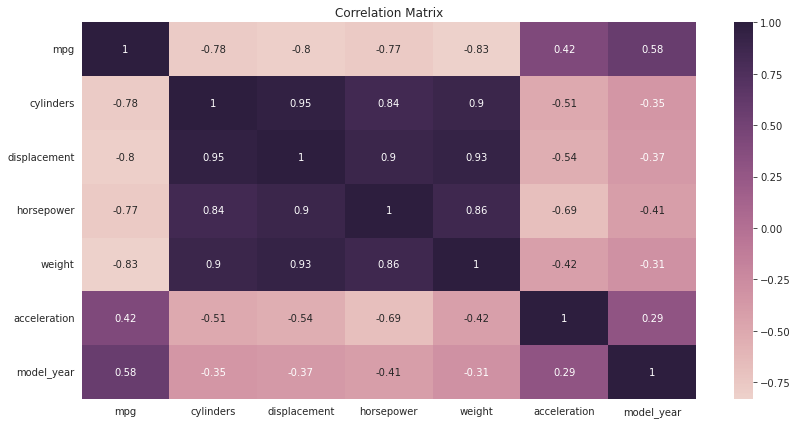

In [52]:
color_palette = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(12,6))
sns.heatmap(car_df.corr(), 
            annot=True, 
            cmap=color_palette)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

1. **Postive Correlated columns (r > 0.6):**
- cylinders ⇔ displacement, cylinders ⇔ horsepower, 
- cylinders ⇔ weight, displacement ⇔ horsepower
- displacement ⇔ weight, horsepower ⇔ weight
2. **Negative Correlated columns (r < -0.6):**
- mpg ⇔ cylinders, mpg ⇔ displacement
- mpg ⇔ horsepower, mpg ⇔ weight 
- horsepower ⇔ acceleration


## 1. mpg:

In [53]:
car_df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [54]:
car_df.mpg.mode()

0    13.0
dtype: float64

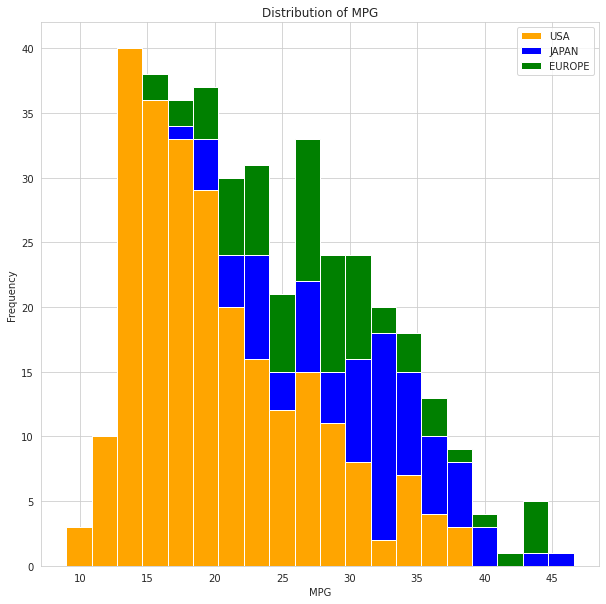

In [55]:
# Histogram of MPG with respect to cars' origin
# This plot will show the distribution of fuel efficiency values.
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.mpg,
          japan_car_df.mpg,
          europe_car_df.mpg],
         bins=20,
         stacked=True,
         color=["orange","blue","green"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

Most of the MPG values lie between 13 to 25.

## 2. cylinders:

In [56]:
car_df.cylinders.describe()

count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

In [57]:
car_df.cylinders.mode()

0    4
dtype: int64

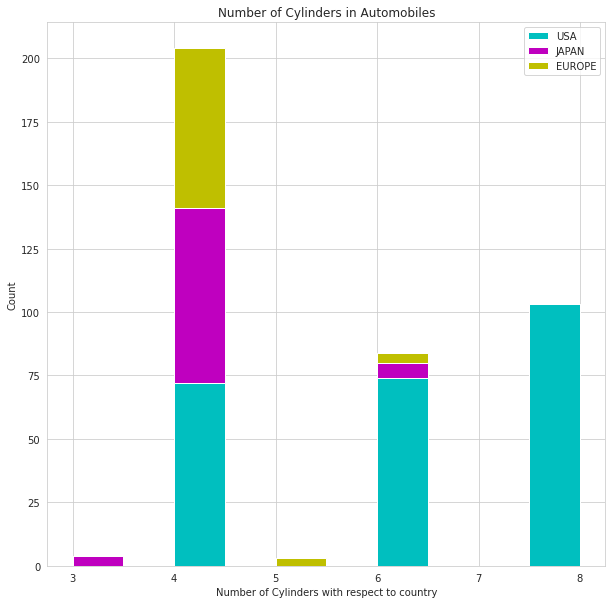

In [58]:
# Bar plot of Cylinders with respect to cars' origin
# This plot will display the frequency or count of automobiles for each number of cylinders.
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.cylinders,
          japan_car_df.cylinders,
          europe_car_df.cylinders],
         stacked=True,
         color=["c","m","y"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('Number of Cylinders with respect to country')
plt.ylabel('Count')
plt.title('Number of Cylinders in Automobiles')
plt.show()

*Most cars have four cylinders and almost no cars have three or five cylinders.*


## 3. displacement:

In [59]:
car_df.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

In [60]:
car_df.displacement.mode()

0    97.0
dtype: float64

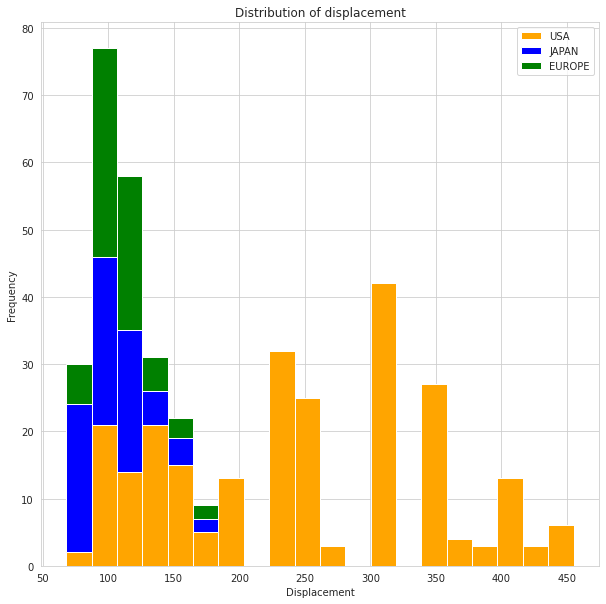

In [61]:
# Histogram of displacement with respect to cars' origin
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.displacement,
          japan_car_df.displacement,
          europe_car_df.displacement],
         bins=20,
         stacked=True,
         color=["orange","blue","green"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.title('Distribution of displacement')
plt.show()

## 4. weight:

In [62]:
car_df.weight.describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

In [63]:
car_df.weight.mode()

0    1985
1    2130
dtype: int64

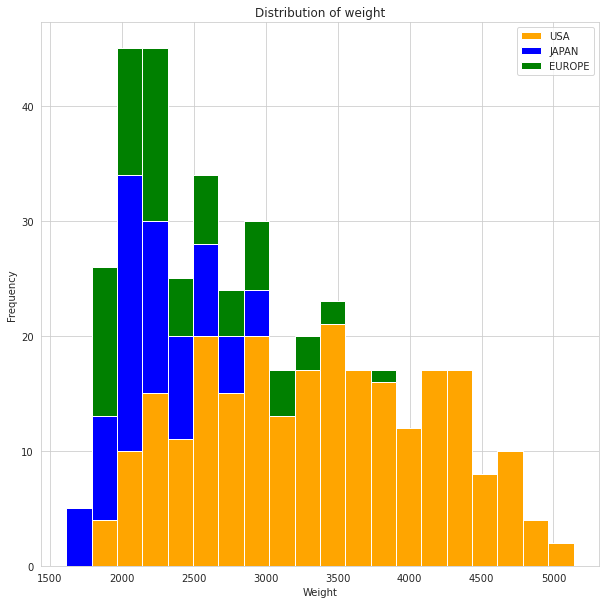

In [64]:
# Histogram of cars' weight with respect to cars' origin
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.weight,
          japan_car_df.weight,
          europe_car_df.weight],
         bins=20,
         stacked=True,
         color=["orange","blue","green"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of weight')
plt.show()

*Most cars have weights lying in the range 2000 to 3000.*

## 5. acceleration:

In [65]:
car_df.acceleration.describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [66]:
car_df.acceleration.mode()

0    14.5
dtype: float64

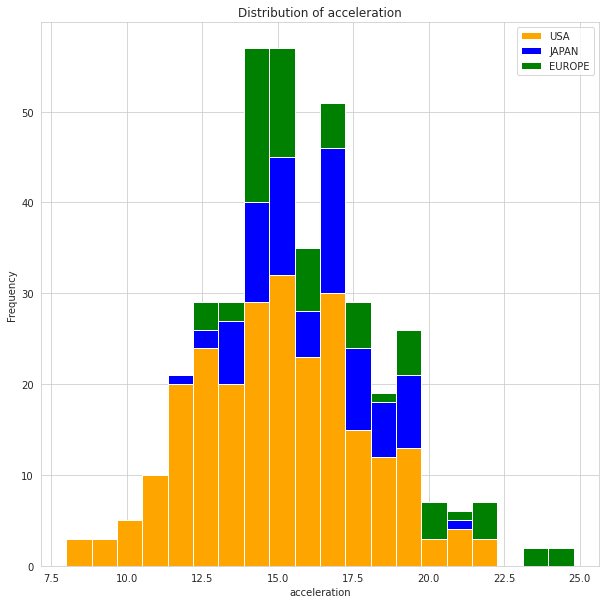

In [67]:
# Histogram of acceleration with respect to cars' origin
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.acceleration,
          japan_car_df.acceleration,
          europe_car_df.acceleration],
         bins=20,
         stacked=True,
         color=["orange","blue","green"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('acceleration')
plt.ylabel('Frequency')
plt.title('Distribution of acceleration')
plt.show()

*Most of the acceleration values are in the range 11 to 20.*

## 6. horsepower:

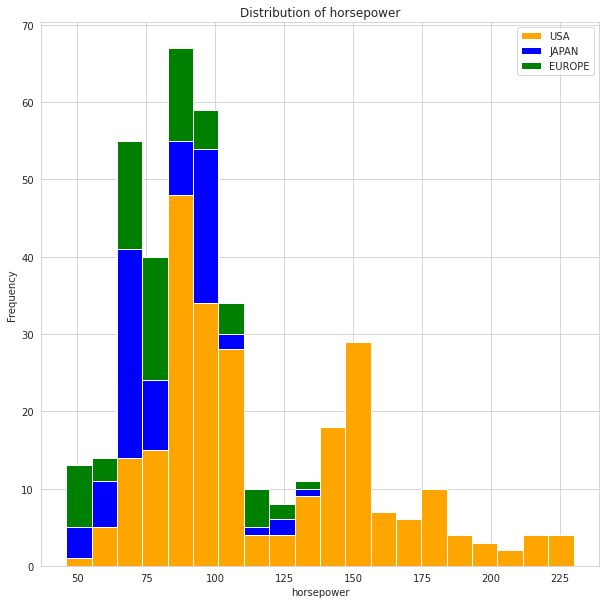

In [68]:
# Histogram of horsepower with respect to cars' origin
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.horsepower,
          japan_car_df.horsepower,
          europe_car_df.horsepower],
         bins=20,
         stacked=True,
         color=["orange","blue","green"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.title('Distribution of horsepower')
plt.show()

*Most of the horsepowers are in the range 55 to 105.*

## 7. model year:

In [69]:
car_df.model_year.mode()

0    73
dtype: int64

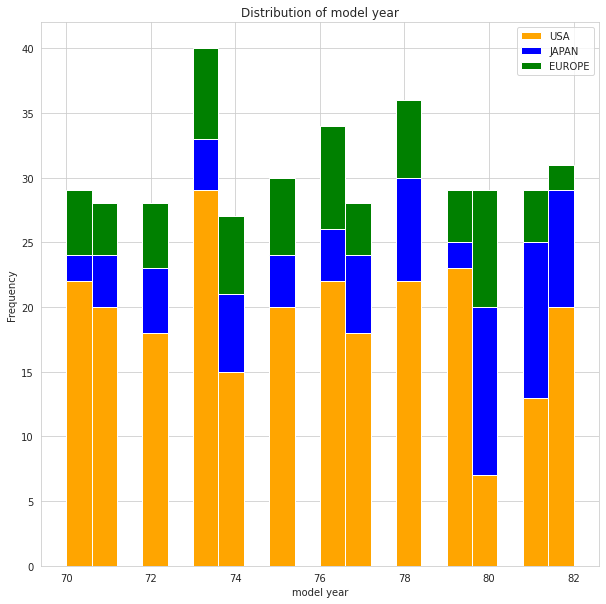

In [70]:
# Histogram of model year with respect to cars' origin
plt.figure(figsize=(10, 10))
plt.hist([usa_car_df.model_year,
          japan_car_df.model_year,
          europe_car_df.model_year],
         bins=20,
         stacked=True,
         color=["orange","blue","green"])
plt.legend(["USA",
            "JAPAN",
            "EUROPE"])
plt.xlabel('model year')
plt.ylabel('Frequency')
plt.title('Distribution of model year')
plt.show()

Most of the unique model years in our dataset are repeated atleast 25 times.

## 8. Name:

In [71]:
# Find the top 10 most repeated car names in our dataset
car_df.name.value_counts(ascending=False).head(10)

ford pinto            6
volkswagen rabbit     5
ford maverick         5
toyota corolla        5
amc matador           5
toyota corona         4
amc hornet            4
chevrolet chevette    4
amc gremlin           4
peugeot 504           4
Name: name, dtype: int64

In [72]:
d={"name":["ford pinto",
           "toyota corolla",
           "amc matador",
           "ford maverick",
           "chevrolet chevette",
           "amc gremlin",
           "chevrolet impala",
           "peugeot 504",
           "amc hornet",
           "toyota corona"],
   "counts":[6,5,5,5,4,4,4,4,4,4]
  }

In [73]:
sort_df=pd.DataFrame.from_dict(d,orient='index').transpose()

In [74]:
sort_df

name counts
0          ford pinto      6
1      toyota corolla      5
2         amc matador      5
3       ford maverick      5
4  chevrolet chevette      4
5         amc gremlin      4
6    chevrolet impala      4
7         peugeot 504      4
8          amc hornet      4
9       toyota corona      4

In [75]:
fig=px.pie(values=sort_df.counts,
       names=sort_df.name,
      title="Top Ten Most Repeated Car Models in the Dataset")
fig.update_layout(title_x=0.5)

## <u>Grouping and Aggregation</u>:

In [76]:
car_df.groupby('origin').mean()

mpg  cylinders  displacement  horsepower       weight  \
origin                                                                
europe  27.891429   4.157143    109.142857   80.928571  2423.300000   
japan   30.450633   4.101266    102.708861   79.835443  2221.227848   
usa     20.083534   6.248996    245.901606  118.638554  3361.931727   

        acceleration  model_year  
origin                            
europe     16.787143   75.814286  
japan      16.172152   77.443038  
usa        15.033735   75.610442

From the data we obtain the following inferences about the data:
- **mpg**: Automobiles manufactured by Japan on average can travel approximately **3 miles more** than of Europe's cars and roughly **10 miles more** than of USA's cars per 1 gallon of fuel.
- **cylinders**: Automobiles manufactured by USA has an average **2 cylinders more** than than the Japan's and Europe's cars.
> Generally, the more cylinders your engine has, the more power is produced. Most cars have a 4, 6, or 8 cylinder engine. The numbers indicate the number of cylinders, and they will either be laid out in a straight line, V-shaped or in a flat arrangement.

(Taken from: [What Is a Cylinder in a Car?](https://www.kia.com/aw/discover-kia/ask/what-is-a-cylinder-in-a-car.html))
- **displacement**: Automobiles manufactured by USA has an average the greatest displacement compared to the other two countries and Japan the least among the two.
> Generally speaking, a higher engine displacement will indicate an engine has more power capability, but a lower engine displacement suggests a vehicle has more fuel efficiency.

(Taken from: [What is Engine Displacement?](https://getjerry.com/car-repair/what-is-engine-displacement#what-is-engine-displacement))
- **horsepower**: Europe and Japan's car engines offer almost similar horsepower whereas USA's cars horsepower highly dominates among the two countries.
> Horsepower is defined as the maximum power available to a vehicle. In theory, the higher the number, the more power is sent to the wheels and the faster it goes.

(Taken from: [Learn the facts: Horsepower vs. Torque: Which Do You Need?](https://www.carmax.com/articles/horsepower-vs-torque-explained))
- **weight**: Automobiles manufactured by USA has an average the highest car weight compared to the other two countries and Japan the least.
> "The heavier the vehicle is, the more energy it needs to get moving. Heavier vehicles have greater inertia and greater rolling resistance, which both contribute to increased fuel consumption. Reducing weight is a very effective way to improve a vehicle's efficiency."

(Taken from: [Learn the facts: Weight affects fuel consumption](https://natural-resources.canada.ca/sites/www.nrcan.gc.ca/files/oee/pdf/transportation/fuel-efficient-technologies/autosmart_factsheet_16_e.pdf))

*This evident by its cars having greater number of cylinders as observed from our dataset.*

- **acceleration**: Automobiles manufactured by Japan and Europe have almost simliar value of average acceleration and USA trails them by 1 unit.


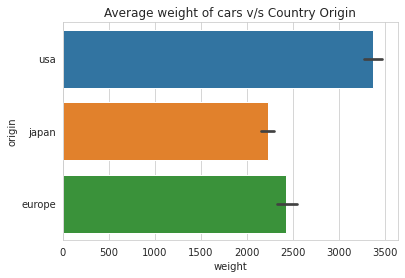

In [77]:
sns.barplot(x="weight", y="origin", data=car_df)
plt.title ("Average weight of cars v/s Country Origin" );

In [78]:
car_df.corr().round(2) # Correlation matrix

mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.80       -0.77   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.51   
displacement -0.80       0.95          1.00        0.90    0.93         -0.54   
horsepower   -0.77       0.84          0.90        1.00    0.86         -0.69   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.51         -0.54       -0.69   -0.42          1.00   
model_year    0.58      -0.35         -0.37       -0.41   -0.31          0.29   

              model_year  
mpg                 0.58  
cylinders          -0.35  
displacement       -0.37  
horsepower         -0.41  
weight             -0.31  
acceleration        0.29  
model_year          1.00

In [79]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

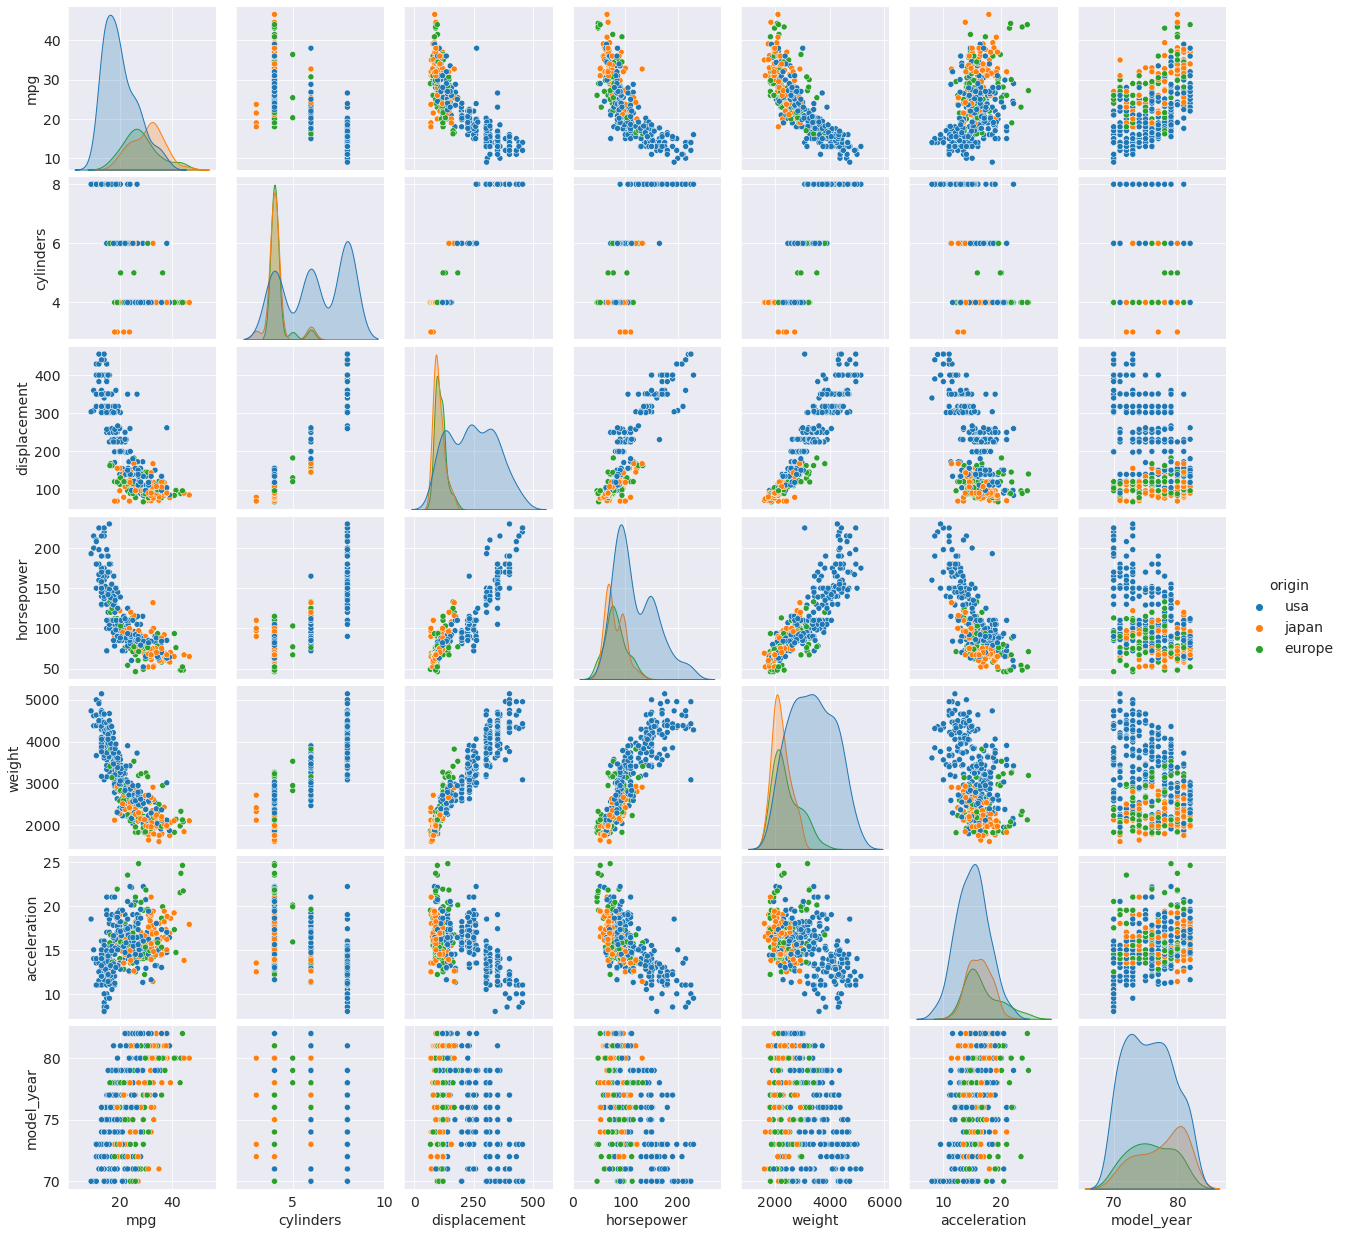

In [80]:
# Plots among different possible numeric column combinations
sns.pairplot(car_df,hue='origin')
plt.show()

## <font color= blue> <u>Asking and Answering Questions</u> </font>

As part of the exploratory data analysis, asking and answering questions is an essential step to gain insights and extract meaningful information from the car dataset. By formulating relevant questions and finding answers within the dataset, we can uncover patterns, relationships, and trends.



#### Q1: Does car with higher displacement tend to have better MPG?

To answer this question, we plot a scatter plot to help us in drawing a correct inference on the basis of given sample data.

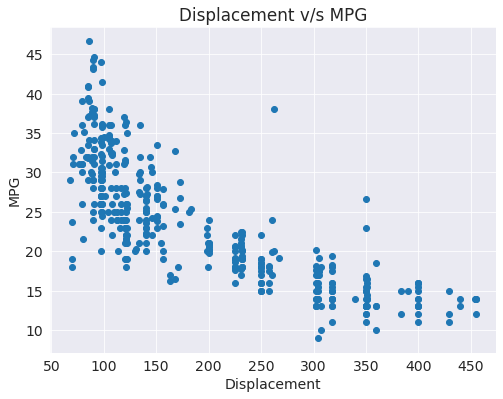

In [81]:
# Scatter plot of Displacement v/s MPG
# This plot will help visualize the relationship between engine displacement and fuel efficiency.
plt.figure(figsize=(8, 6))
plt.scatter(car_df['displacement'], car_df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('Displacement v/s MPG')
plt.show()



From the above scatter plot, we see that displacement is approximately inversely proportional to MPG (not taking into account the outliers in our dataset). So as the displacement increases, the MPG decreases and vice-versa. 

Hence, we can say that on the basis of the given dataset, *cars with higher displacement tend to have lower MPG.*

#### Q2: Which model year and country has the highest car automobile count?

We can answer this question by drawing an appropriate visualisation (histogram) for the car model year.

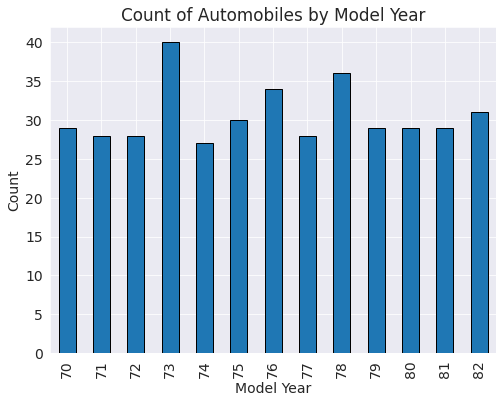

In [82]:
# Bar plot of Model Year
# This plot will show the count of automobiles for each year of manufacture.
plt.figure(figsize=(8, 6))
car_df['model_year'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Count of Automobiles by Model Year')
plt.show()

*We see that model year 73 has the highest automobile count.*

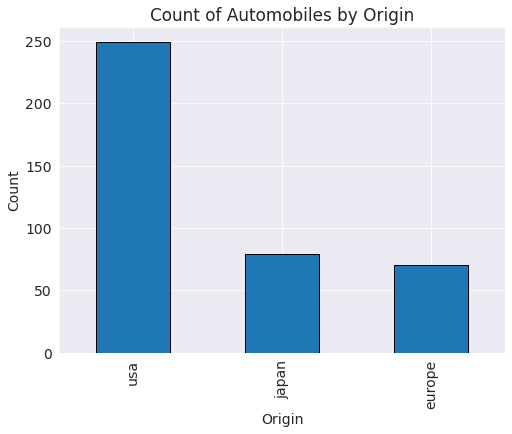

In [83]:
# Bar plot of Origin
# This plot will display the count of automobiles for each country or region of origin.
plt.figure(figsize=(8, 6))
car_df['origin'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Count of Automobiles by Origin')
plt.show()

*We see that USA produces the highest automobile count in our data from the above plot.*

#### Q3: Do  cars with more cylinders have higher horsepower compared to cars with fewer cylinders?

We can answer this question by drawing an appropriate visualisation (scatter plot) for horsepower against cars' cylinders.

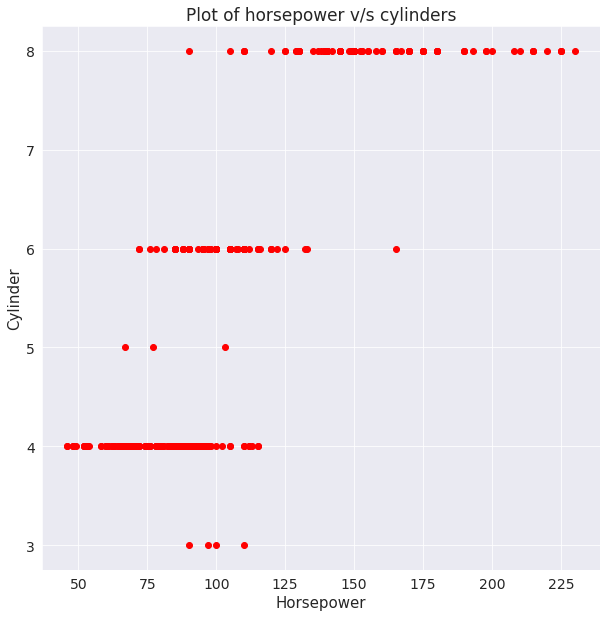

In [84]:
# Plot of horsepower v/s cylinders
plt.figure(figsize=(10,10))
plt.scatter( car_df.horsepower, car_df.cylinders, color="red")
plt.xlabel ("Horsepower", fontsize=15)
plt.ylabel ("Cylinder", fontsize=15)
plt.title ("Plot of horsepower v/s cylinders", fontsize=17)
plt.show()

From the plot, it is evident that cars with more cylinders tend to have higher horsepower as compared to cars with fewer cylinders.

#### Q4: Is there a trend in the weight of cars over different model years?

A line plot won't be useful in answering this question because we have many data points scattered over a particular range of data. Instead we use a scatter plot for answering this question and will try to observe if there's an increasing or decreasing trend among the two variables plotted against each other while ignoring the outliers.

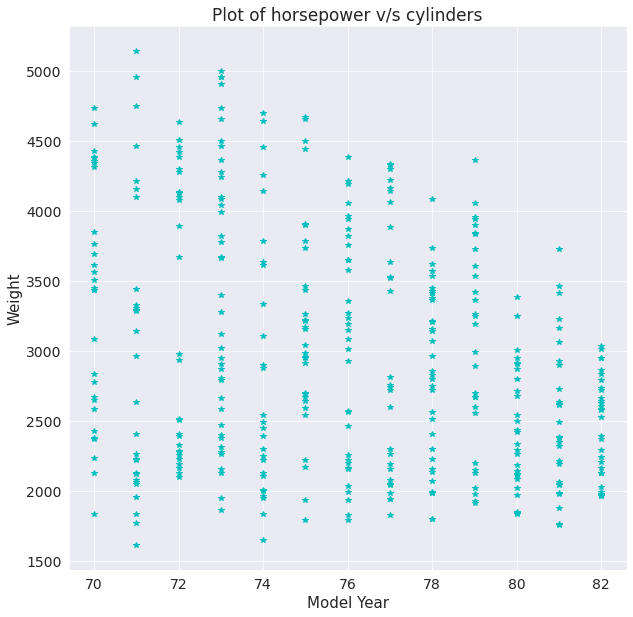

In [85]:
# Plot to see if there's a trend in the weight of cars over different model years
plt.figure(figsize=(10,10))
plt.plot(car_df.model_year, car_df.weight, "*c")
plt.ylabel ("Weight", fontsize=15)
plt.xlabel ("Model Year", fontsize=15)
plt.title ("Plot of horsepower v/s cylinders", fontsize=17)
plt.show()

There is a weak trend where we see that as the model year increases, the weight of car reduces (ignoring the outliers).

#### Q5. Are there any differences in acceleration based on the number of cylinders?

To answer this question, we will employ a line plot.

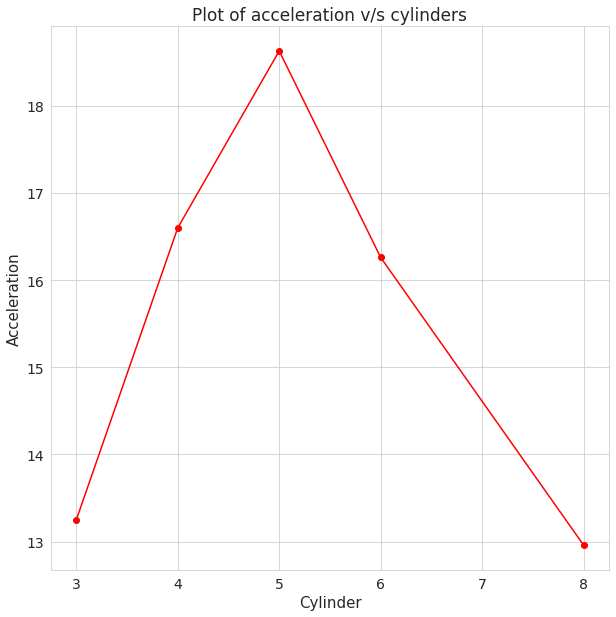

In [87]:
# Plot of horsepower v/s cylinders
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
accl_df=car_df.groupby("cylinders").mean().round(2)
plt.plot( [3,4,5,6,8], accl_df.acceleration,  "o-r")
plt.ylabel ("Acceleration", fontsize=15)
plt.xlabel ("Cylinder", fontsize=15)
plt.title ("Plot of acceleration v/s cylinders", fontsize=17)
plt.show()

Yes, there are differences in acceleration based on the number of cylinders. By comparing the average acceleration for different numbers of cylinders, we find that cars with fewer cylinders tend to have better acceleration. 

This implies that cars with smaller engines, typically having fewer cylinders, can accelerate more quickly.

From the given conditions in the question, we see that only **3 cars** satisfy them.

## <font color= blue> <u>Inferences and Conclusion</u> </font>

After conducting the exploratory analysis on the car dataset, several inferences and conclusions can be drawn regarding the features and characteristics of the automobiles. Here is a summary of the key findings and conclusions derived from the analysis:

- **Fuel Efficiency:**

The MPG (Miles Per Gallon) feature exhibits a right-skewed distribution, with the majority of cars having MPG values between 15 and 30.
Cars with higher numbers of cylinders tend to have lower MPG, indicating a negative correlation between these variables.
- **Engine Specifications:**

The number of cylinders in the engine varies from 3 to 8, with 4 and 6 cylinders being the most common configurations.
Engine displacement (engine size) generally ranges from 70 to 455 cubic inches, with a median around 150 cubic inches.
There is a positive correlation between engine displacement and horsepower, suggesting that larger engines tend to produce higher power outputs.
- **Weight and Performance:**

Car weight follows a roughly normal distribution, with most cars weighing between 2000 and 4000 pounds.
Lighter cars tend to have better acceleration, as indicated by a negative correlation between weight and acceleration.
- **Origin and Model Year:**

The dataset contains cars originating from three regions: the United States, Europe, and Asia.
The number of cars from the United States is the highest, followed by Europe and Asia.
The dataset spans multiple model years, with a range from the early 1970s to the late 1980s.
- **Trends Over Time:**

There is a noticeable increase in average MPG over the years, indicating an improvement in fuel efficiency in newer car models.
Horsepower has increased over time, suggesting advancements in engine technology and performance.
- **Correlations:**

Strong positive correlations exist between horsepower and displacement, as well as between horsepower and weight.
There is a negative correlation between MPG and cylinders, weight, and displacement.


These inferences and conclusions provide valuable insights into the relationships and characteristics of the cars in the dataset. It is important to note that these observations are based on the specific dataset and analysis conducted. Further analysis and modeling can be performed to delve deeper into specific aspects or to make predictions based on the dataset.

## <font color= blue> <u>References and Future Work</u> </font>
1. <u> **Sources**</u>:
- https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset
- https://en.wikipedia.org/wiki/Horsepower
- https://www.caranddriver.com/features/a16581035/car-terms-defined/

2. <u>**Future Work**</u>:

After conducting the initial exploratory analysis on the car dataset, there are several potential avenues for future work and further analysis. Here are some ideas to consider:

- **Predictive Modeling:** Build predictive models to estimate or predict certain car attributes such as MPG, horsepower, or acceleration based on other features in the dataset. This can involve techniques such as linear regression, decision trees, random forests, or neural networks.


- **Outlier Detection:** Perform a more detailed analysis to identify and analyze outliers in the dataset. Investigate the reasons behind these outliers and assess their impact on the analysis and modeling results.

- **Dimensionality Reduction:** Apply dimensionality reduction techniques like Principal Component Analysis (PCA) or t-SNE to explore patterns and relationships within the dataset. This can help visualize high-dimensional data and potentially identify clusters or groupings of cars.

- **Time-Series Forecasting:** If the dataset contains information on car sales or production over time, apply time-series forecasting techniques to predict future trends in car attributes, such as MPG or horsepower.

- **Clustering Analysis:** Perform clustering analysis to group cars based on similar attributes, such as MPG, horsepower, weight, or displacement. Identify distinct clusters or segments of cars based on these attributes.

These future work and ideas can enhance the analysis of the car dataset, uncover deeper insights, and enable more advanced modeling and prediction.

In [88]:
import jovian

In [89]:
project_name = "car-information-eda-course-project-sarbojit" # Name of the course project

In [90]:
jovian.commit(project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sarbojit-25/car-information-eda-course-project-sarbojit" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/sarbojit-25/car-information-eda-course-project-sarbojit


'https://jovian.com/sarbojit-25/car-information-eda-course-project-sarbojit'